# Regresi analysis

Melakukan regresi analisis dari data anak sekolah

In [1]:
## Operation 
import pandas as pd
import numpy as np

## Viz
import matplotlib.pyplot as plt
import seaborn as sns

## Get Data

In [2]:
dta=pd.read_csv('student-mat.csv')

In [3]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
dta.shape

(395, 33)

In [5]:
dta.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Goal

what is the most significant feature for `G3`??

In [6]:
target_col=['G3']

In [7]:
dta['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

## Categoric Data

In [37]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
## Get the categorical columns
col_cat=dta.dtypes[dta.dtypes!='int64'].index.tolist()

In [46]:
dta[col_cat].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [62]:
## sex and G3
### Statistical test
dta[['sex','G3']].groupby('sex').G3.mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

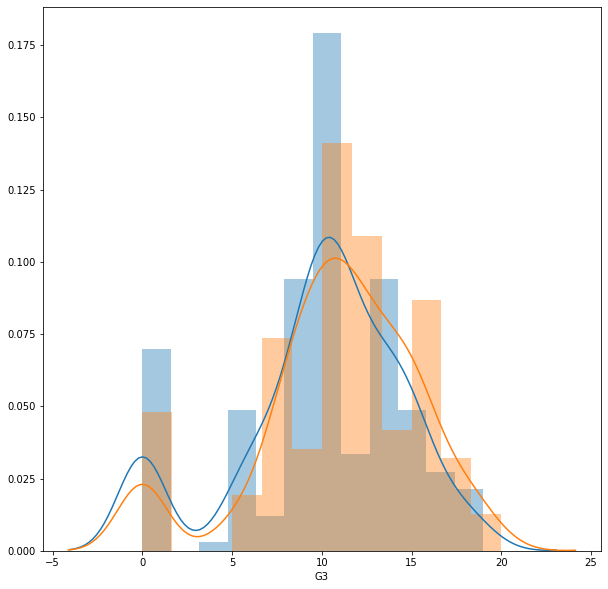

In [61]:
plt.figure(figsize=(10,10))
sns.distplot(dta[dta['sex']=='F']['G3'],label='Female')
sns.distplot(dta[dta['sex']=='M']['G3'],label='Male')

In [68]:
## school and G3
### Statistical test (t-test)
dta.groupby('school').G3.mean()

school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

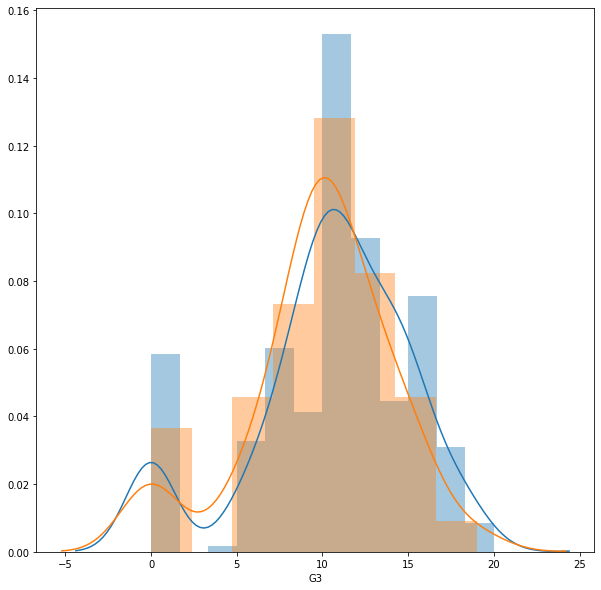

In [66]:
plt.figure(figsize=(10,10))
sns.distplot(dta[dta['school']=='GP']['G3'])
sns.distplot(dta[dta['school']=='MS']['G3'])

In [67]:
## reason and G3
### Statistical test (ANOVA)
dta.groupby('reason').G3.mean()

reason
course         9.820690
home          10.256881
other         11.166667
reputation    11.142857
Name: G3, dtype: float64

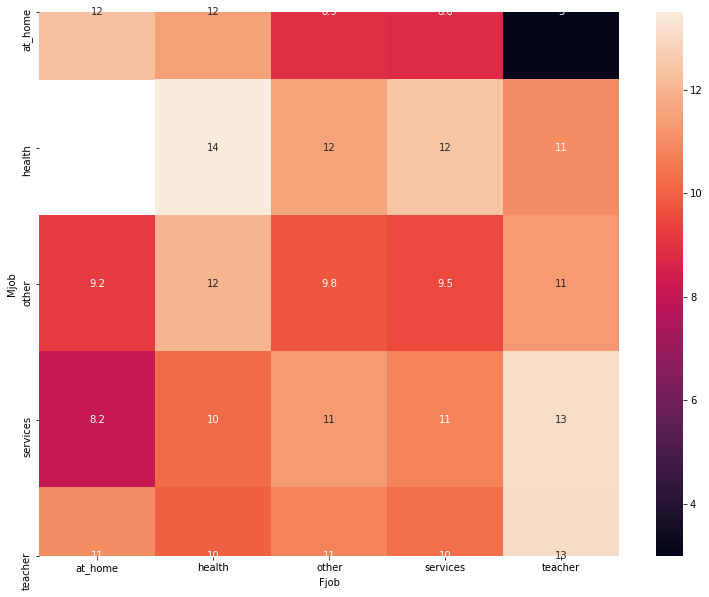

In [80]:
plt.figure(figsize=(13,10))
sns.heatmap(dta.groupby(['Mjob','Fjob']).G3.mean().unstack(),annot=True)

In [82]:
plt.figure(figsize=(13,10))
dta.groupby(['Mjob','Fjob']).G3.size().unstack()

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,7.0,2.0,33.0,15.0,2.0
health,NaN,6.0,17.0,10.0,1.0
other,5.0,2.0,104.0,24.0,6.0
services,6.0,4.0,42.0,43.0,8.0
teacher,2.0,4.0,21.0,19.0,12.0


<Figure size 936x720 with 0 Axes>

In [93]:
dta['Mjob2']=np.where((dta['Mjob']=='teacher')|(dta['Mjob']=='health'),'services',
                      np.where(dta['Mjob']=='at_home','other',dta['Mjob']))
dta['Fjob2']=np.where((dta['Fjob']=='teacher')|(dta['Fjob']=='health'),'services',
                      np.where(dta['Fjob']=='at_home','other',dta['Fjob']))

In [95]:
plt.figure(figsize=(13,10))
dta.groupby(['Mjob2','Fjob2']).G3.mean().unstack()

Fjob2,other,services
Mjob2,,
other,9.691275,9.431373
services,11.034091,11.383178


<Figure size 936x720 with 0 Axes>

In [100]:
## reason and G3
### Statistical test (ANOVA)
dta.groupby('Mjob').agg({'G3':[np.mean,np.size]})

G3     
               mean size
Mjob                    
at_home    9.152542   59
health    12.147059   34
other      9.822695  141
services  11.019417  103
teacher   11.051724   58

In [84]:
## reason and G3
### Statistical test (ANOVA)
dta.groupby('guardian').agg({'G3':[np.mean,np.size]})

G3     
               mean size
guardian                
father    10.688889   90
mother    10.483516  273
other      9.062500   32

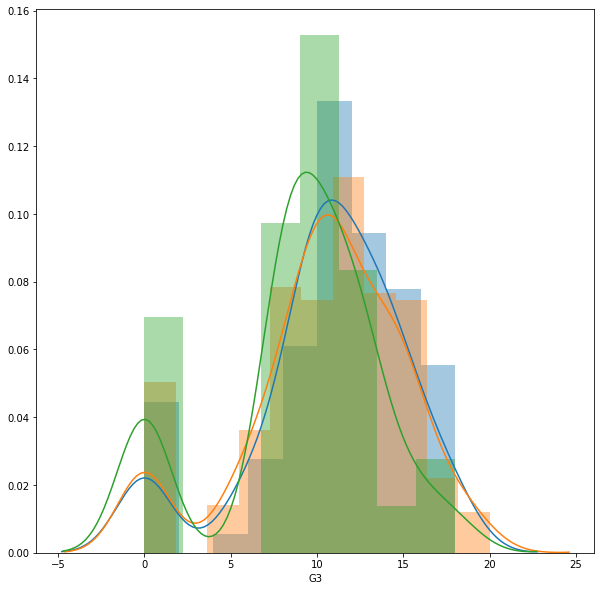

In [86]:
plt.figure(figsize=(10,10))
sns.distplot(dta[dta['guardian']=='father']['G3'])
sns.distplot(dta[dta['guardian']=='mother']['G3'])
sns.distplot(dta[dta['guardian']=='other']['G3'])

In [109]:
## T-Test
## Ngutang

col_ttest=dta[col_cat].describe().transpose()
col_ttest=col_ttest[col_ttest['unique']==2].index.tolist()
col_ttest

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Numerical

In [114]:
## Get the categorical columns
col_num=dta.dtypes[dta.dtypes=='int64'].index.tolist()
col_num=list(set(col_num)-set(['G1','G2','G3']))
col_num

['absences',
 'Fedu',
 'Walc',
 'failures',
 'studytime',
 'Dalc',
 'famrel',
 'health',
 'traveltime',
 'Medu',
 'freetime',
 'age',
 'goout']

In [127]:
(dta[col_num+target_col].corr()**2)['G3'].sort_values()

freetime      0.000128
absences      0.001173
famrel        0.002638
Walc          0.002698
Dalc          0.002988
health        0.003762
studytime     0.009569
traveltime    0.013722
goout         0.017634
Fedu          0.023243
age           0.026108
Medu          0.047153
failures      0.129899
G3            1.000000
Name: G3, dtype: float64

In [134]:
## high corr
XX=(dta[col_num+target_col].corr()**2)['G3'].sort_values()
col_high_corr=XX[(XX>0.01)&(XX<0.9999)].index.tolist()

In [135]:
col_high_corr

['traveltime', 'goout', 'Fedu', 'age', 'Medu', 'failures']

## Regression Part

In [151]:
col_high_corr

['traveltime', 'goout', 'Fedu', 'age', 'Medu', 'failures']

In [137]:
X=dta[col_high_corr]
y=dta[target_col]

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
modLin=LinearRegression()
modLin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
dta['G3_pred']=modLin.predict(X)

In [145]:
# dta[['G3','G3_pred']]
dta['error']=dta['G3']-dta['G3_pred']

In [147]:
# MSE
np.sqrt((dta['error']**2).mean())

4.180101841398215

In [150]:
modLin.coef_

array([[-0.40594526, -0.39179667, -0.13809864, -0.18595629,  0.64066645,
        -1.86187695]])

## Regression Part (standardize)

In [152]:
col_high_corr

['traveltime', 'goout', 'Fedu', 'age', 'Medu', 'failures']

In [153]:
X=dta[col_high_corr]
y=dta[target_col]

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [156]:
stsc=StandardScaler()
Xss=stsc.fit_transform(X)

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [157]:
modLinss=LinearRegression()
modLinss.fit(Xss,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
dta['G3_pred_ss']=modLinss.predict(X)

In [159]:
# dta[['G3','G3_pred']]
dta['error_ss']=dta['G3']-dta['G3_pred_ss']

In [160]:
# MSE
np.sqrt((dta['error_ss']**2).mean())

6.251688896845314

In [162]:
modLinss.coef_

array([[-0.2827901 , -0.43562621, -0.15008867, -0.23698761,  0.70047171,
        -1.38283286]])